<a href="https://colab.research.google.com/github/estellasouza/Refugees_analysis/blob/main/MVP_refugees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Objective

In this project I will analize how refugees are distributed around the world. The main problems/questions that I want to address are:
1. What are the main territories of origin of refugees?
2. In which territories they seek asylum/residence in?
3. How does the number of refugees has evolved since 2010?
4. What fraction of refugees are provided with help from the UN?
5. How does Brazil performs when comparing to the countries most seeked by refugees?

Luckly the United Nations provide the public with access to a database that has much of the information we need to start expploring the questions above. The data is provided by the [United Nations High Comissioner for Refugees](https://www.unhcr.org/refugee-statistics/) (UNHCR), and can be accessed at [UN Data](http://data.un.org/Data.aspx?d=UNHCR&f=indID%3aType-Ref). There is no license required for the use or publication of this data set.

Given the size of the data set, I have filtered the data for the period desired directly from the source.

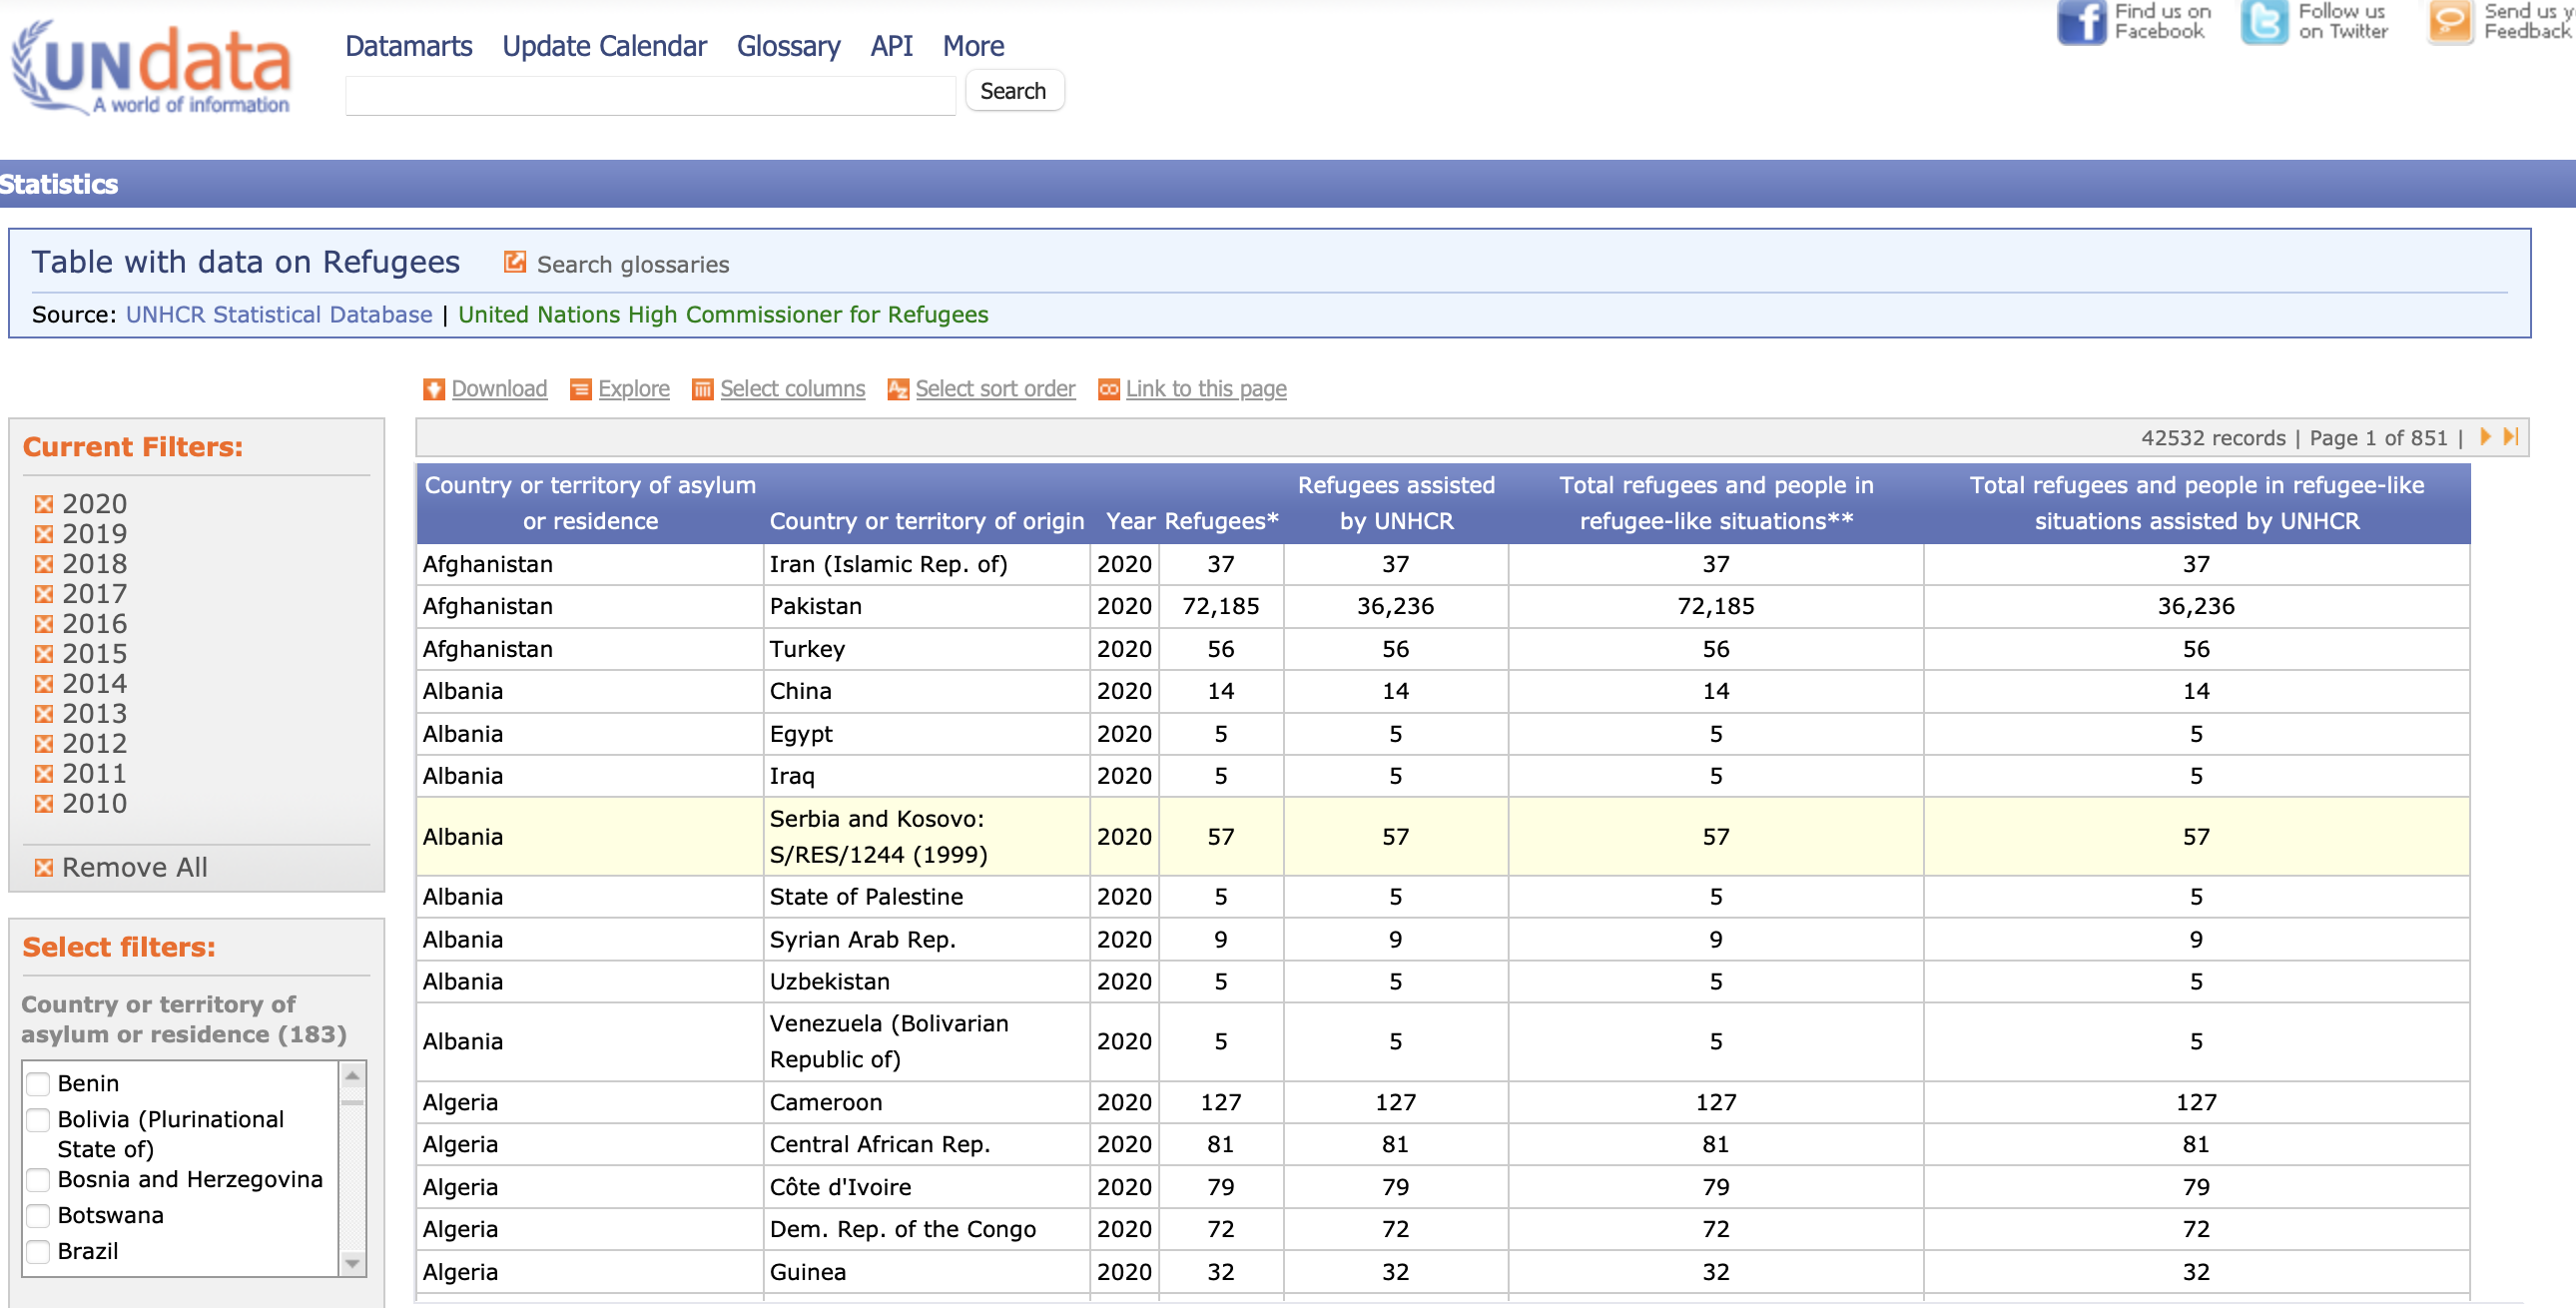

# 2. Data Collection

As discussed above, the data was selected and collected from a data base provided by the United Nations (UN) after the filters for the years (2010-2021) was applied. Note that the database provides data up to 2021, and was last updated in 2022.

The data can be downloaded in a CSV format and then uploaded to the cloud, leveraging the Databricks platform. The file was stored in the DBFS as shown below.

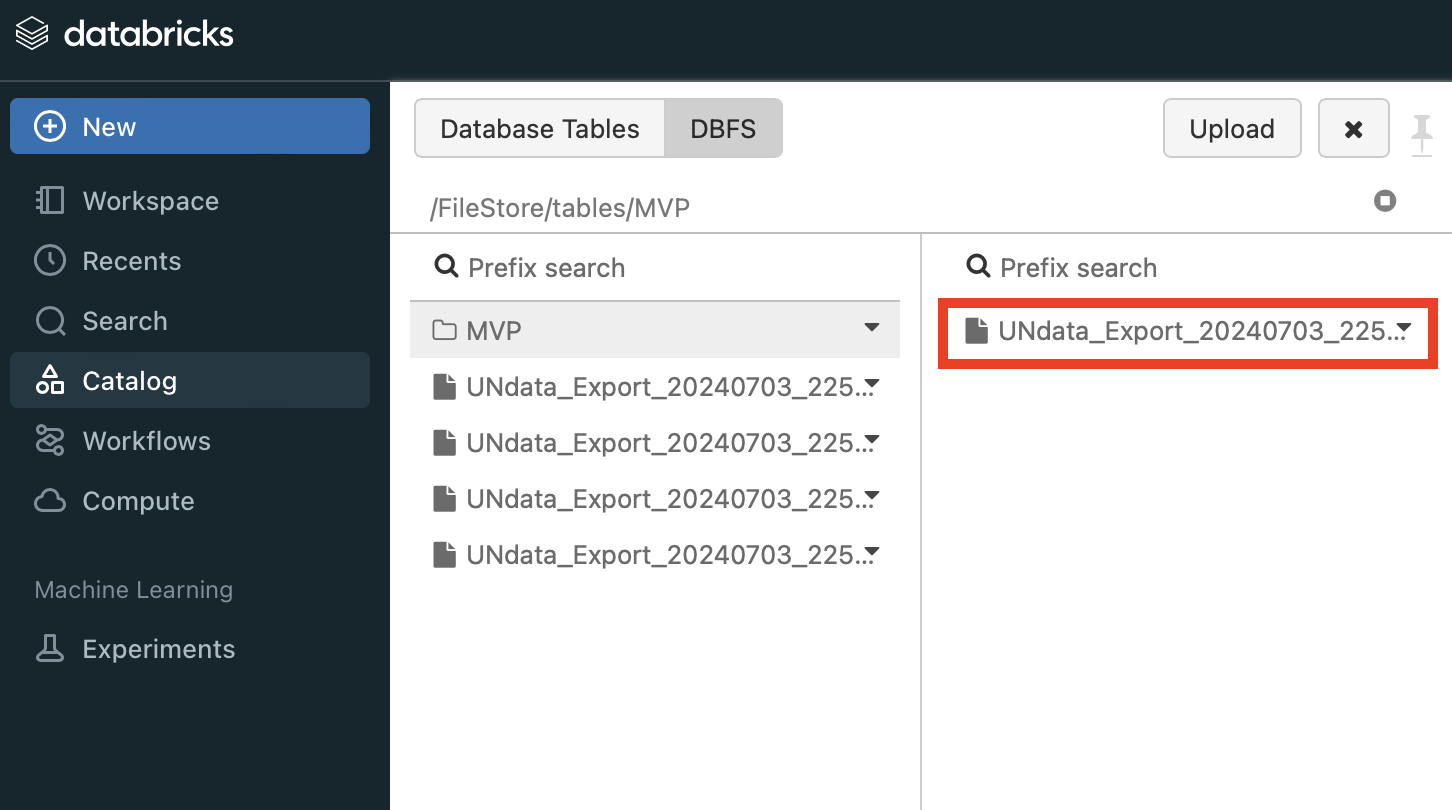

#3. Data Modeling

Since there is a unique data source with only one table, we have a flat model structure, with primary key (country_to, country_from, year). The raw data set has a structure as displayed in the following figure.

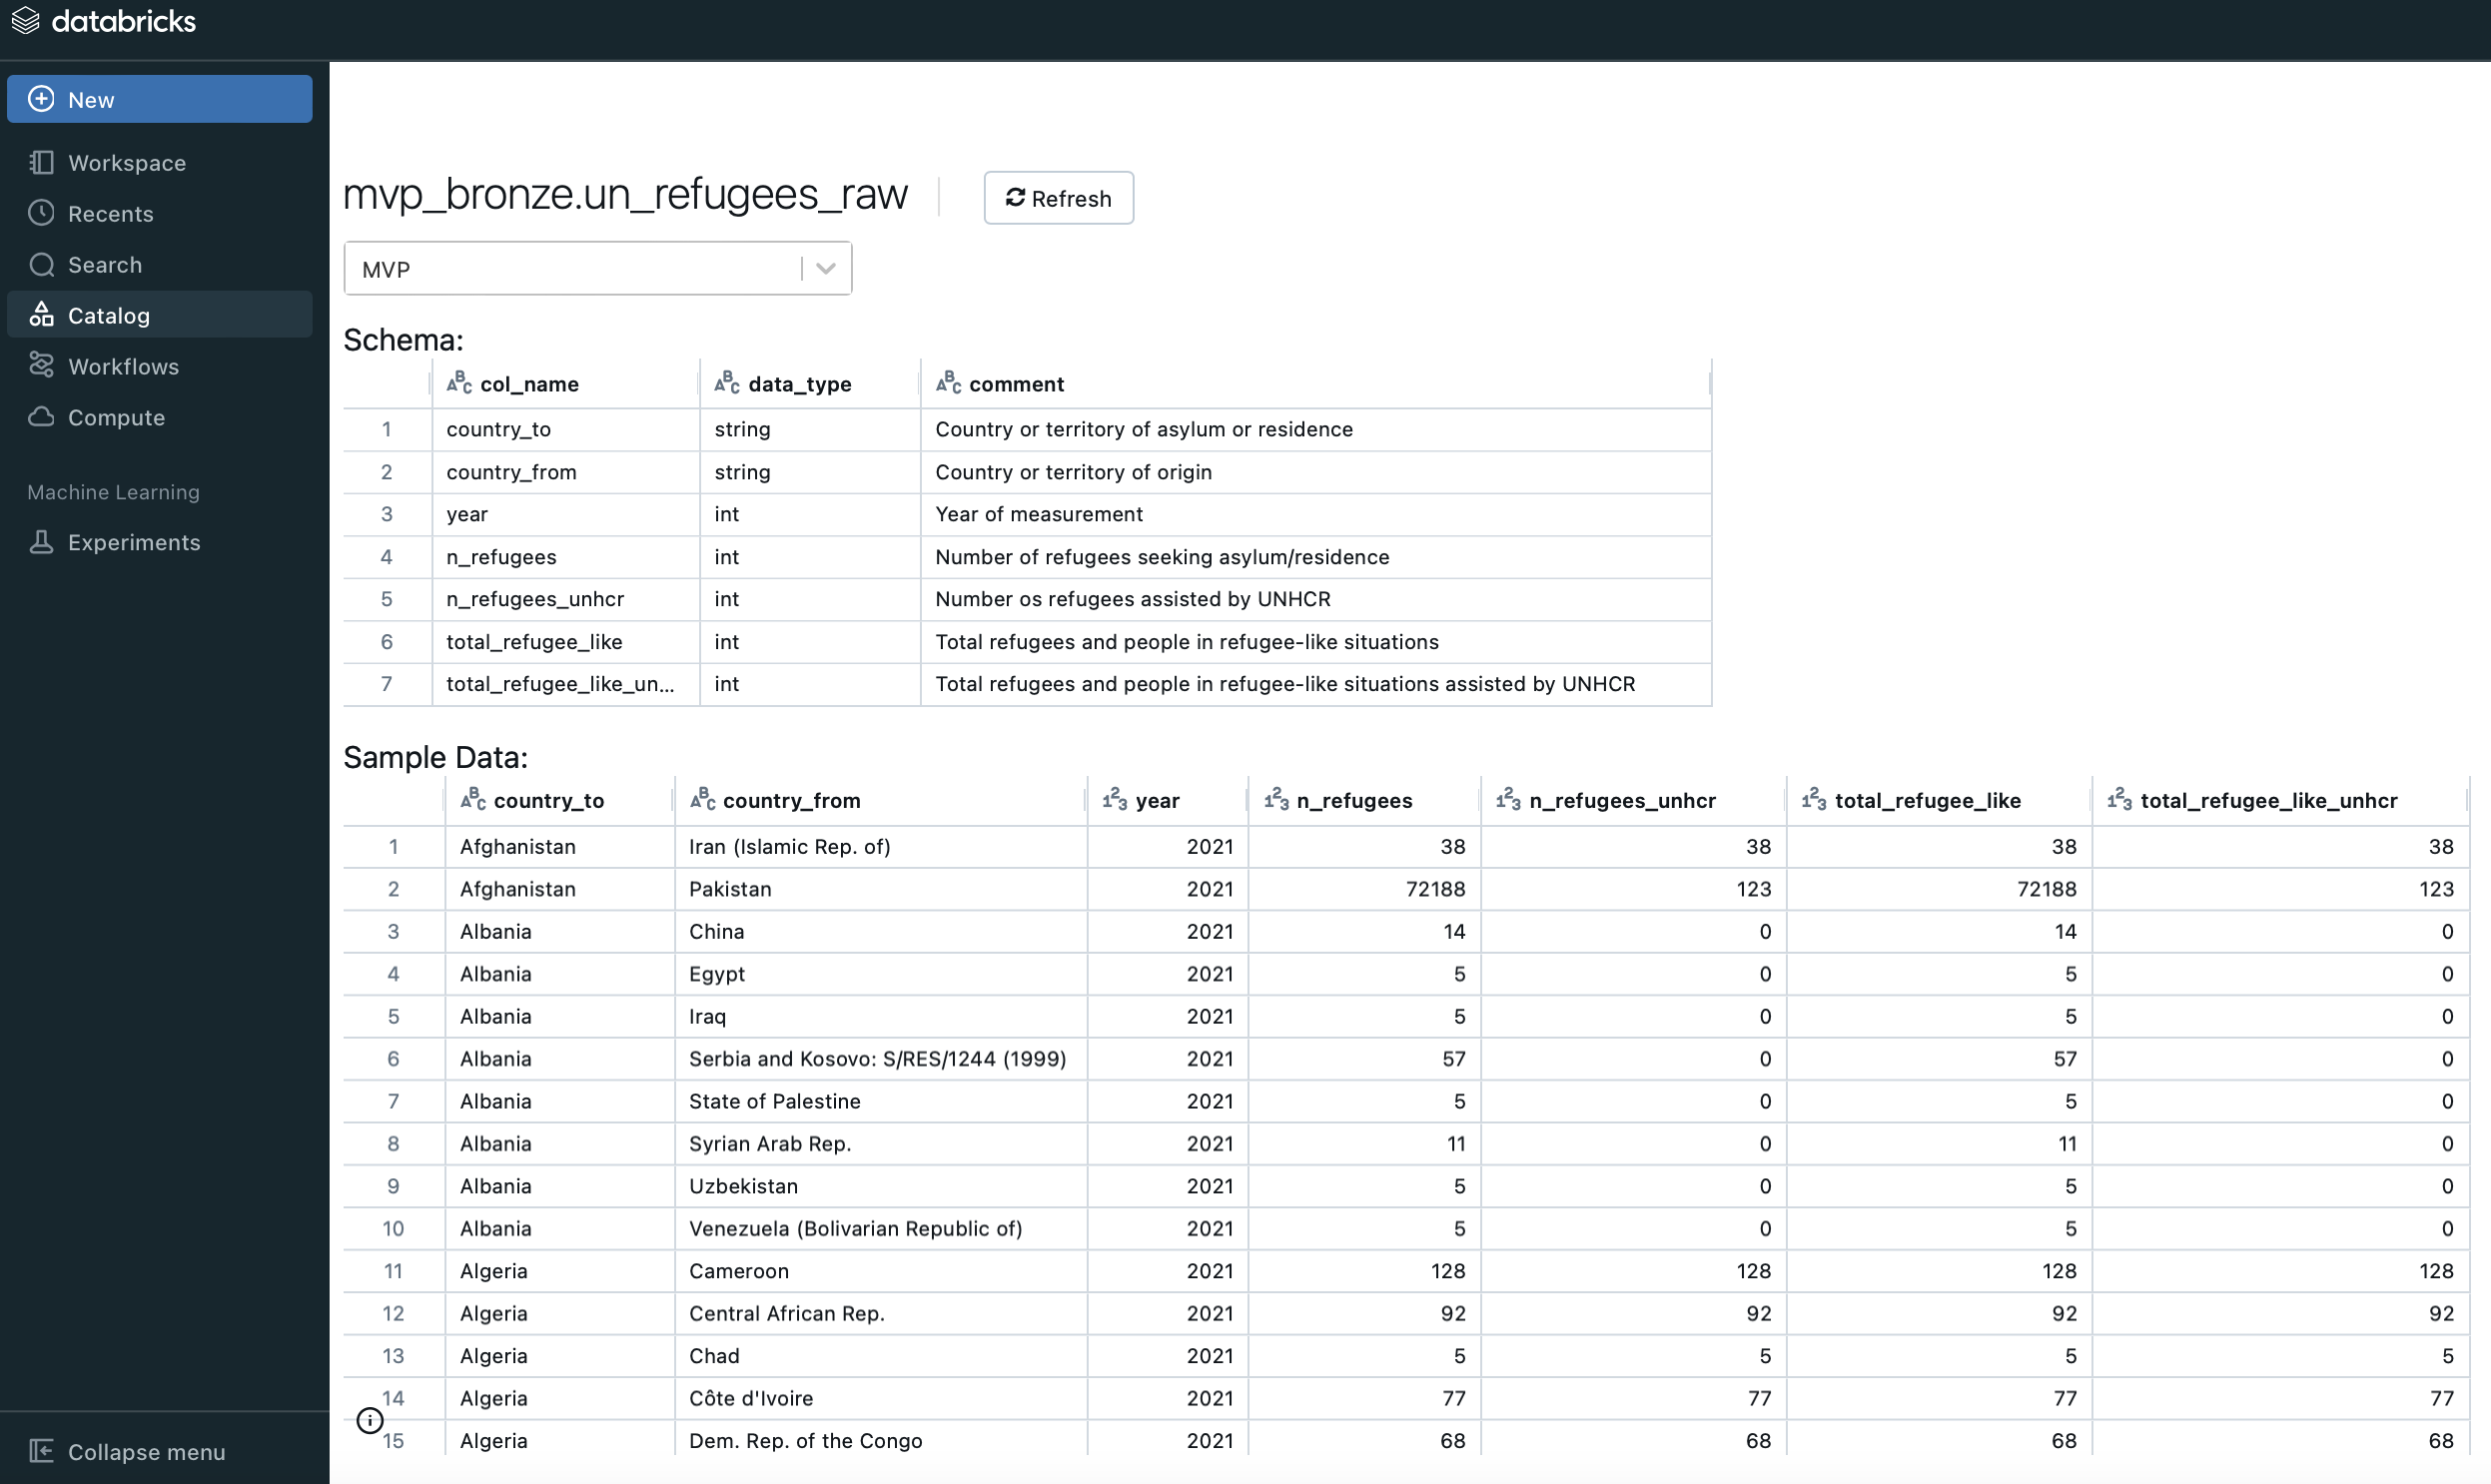

#4. ETL

Now that we have an overview of questions we want to answer, the data that we have collected, and the platform where we will work with our data, let's focus on the ETL process.

A medallion architechture was chosen as the format of our ETL, with a **Bronze**, **Silver**, and **Gold** layer. They are structured as following:
1. Bronze: table with master raw data set
2. Silver: table with master processed data set (cleaned)
3. Gold: tables that enable quick analysis based on the questions that were proposed.

All processing and layers creation was done with SQL and details can be found in each layers' notebooks in this [project's github repository](https://github.com/estellasouza/Refugees_analysis/tree/main/Databricks_notebooks).

##Notebooks

The following figure shows the three notebooks in the Databricks workspace.

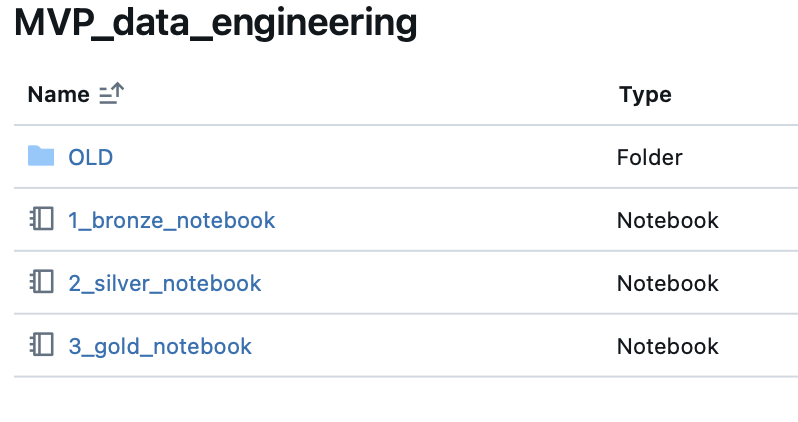

##Databases

The databases and tables created in each of them are shown below.



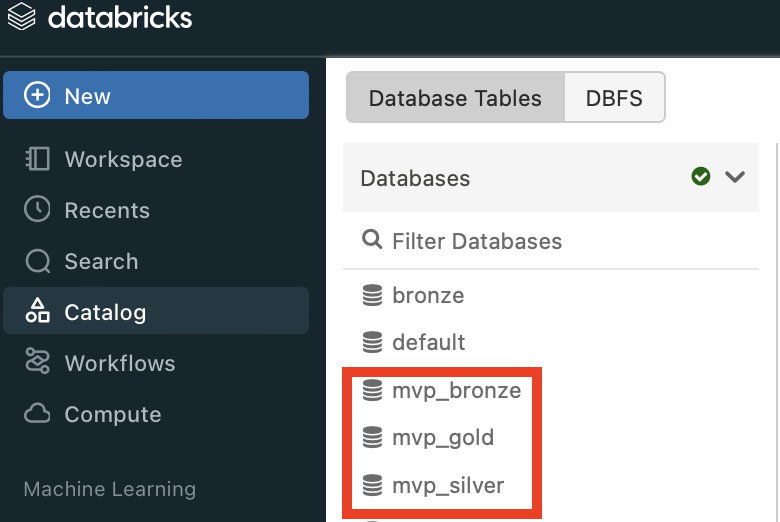

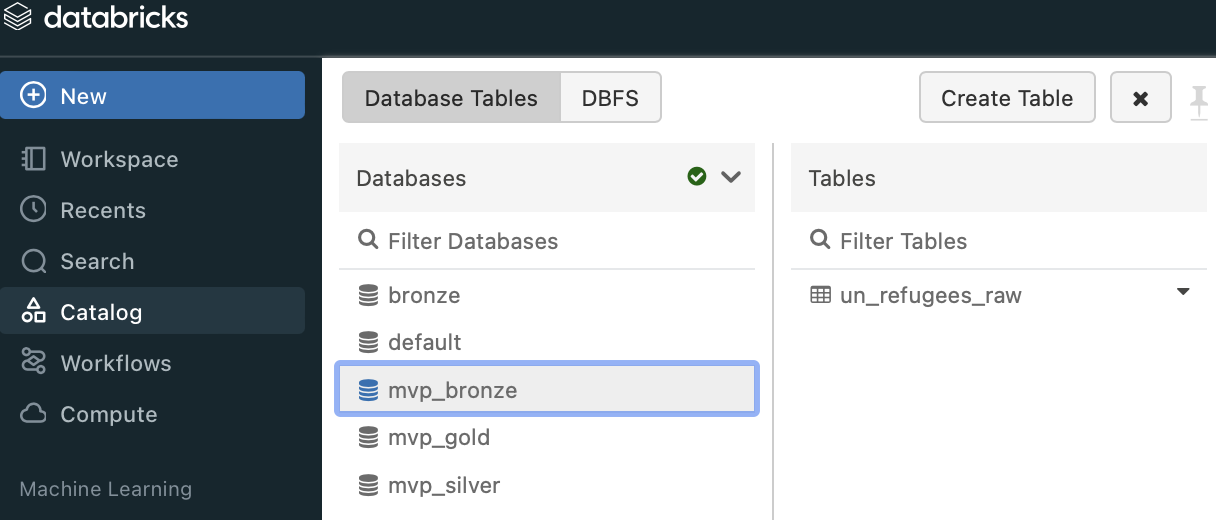

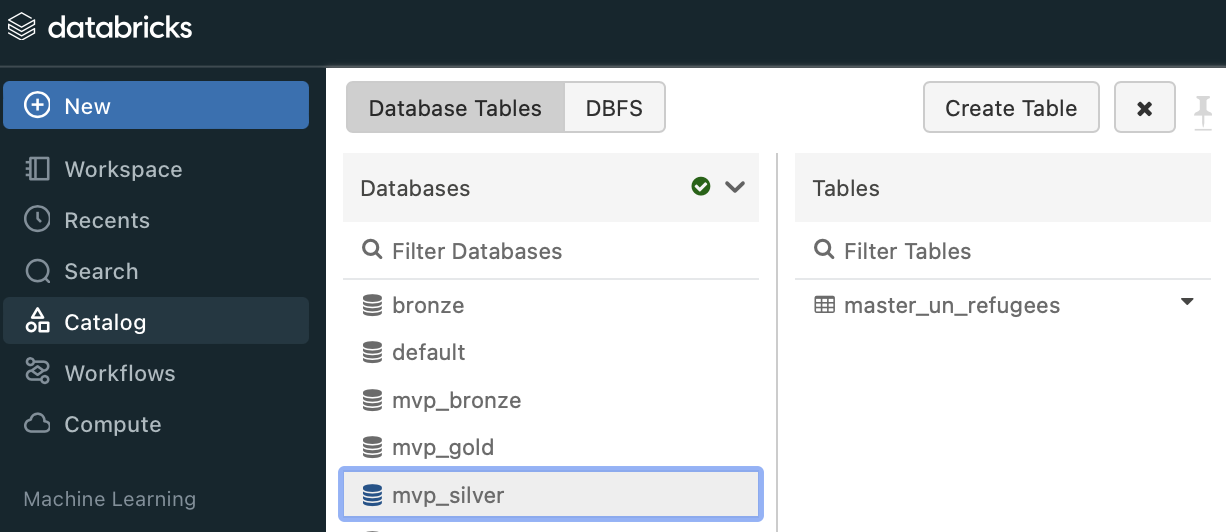

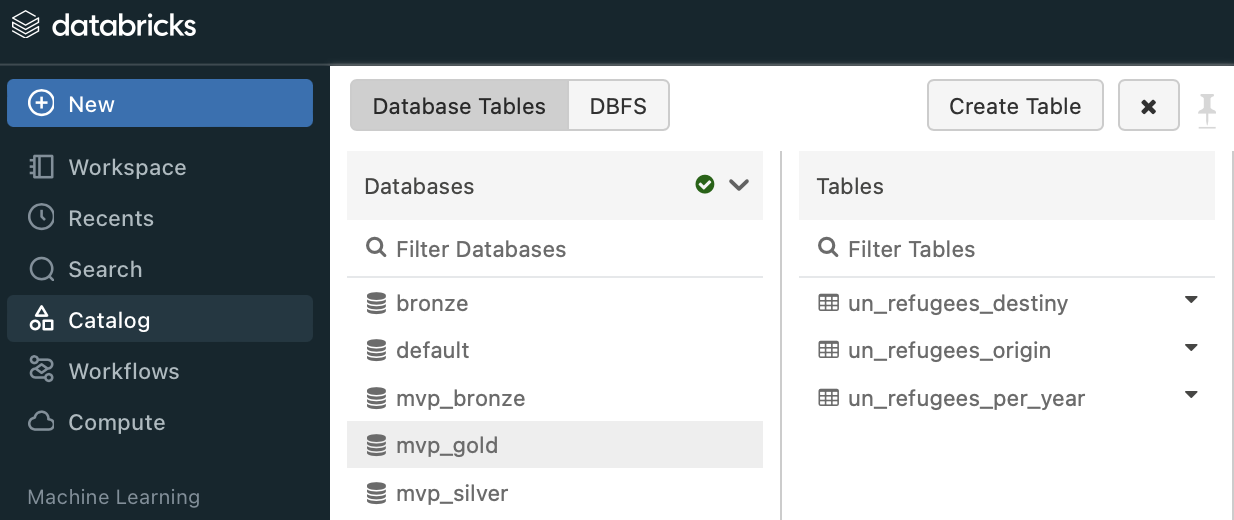

##Tables

All the tables below can be found in this [project's github repository.](https://github.com/estellasouza/Refugees_analysis/tree/main/Databricks_tables) We will make use of them during the analysis section below.

**Bronze**

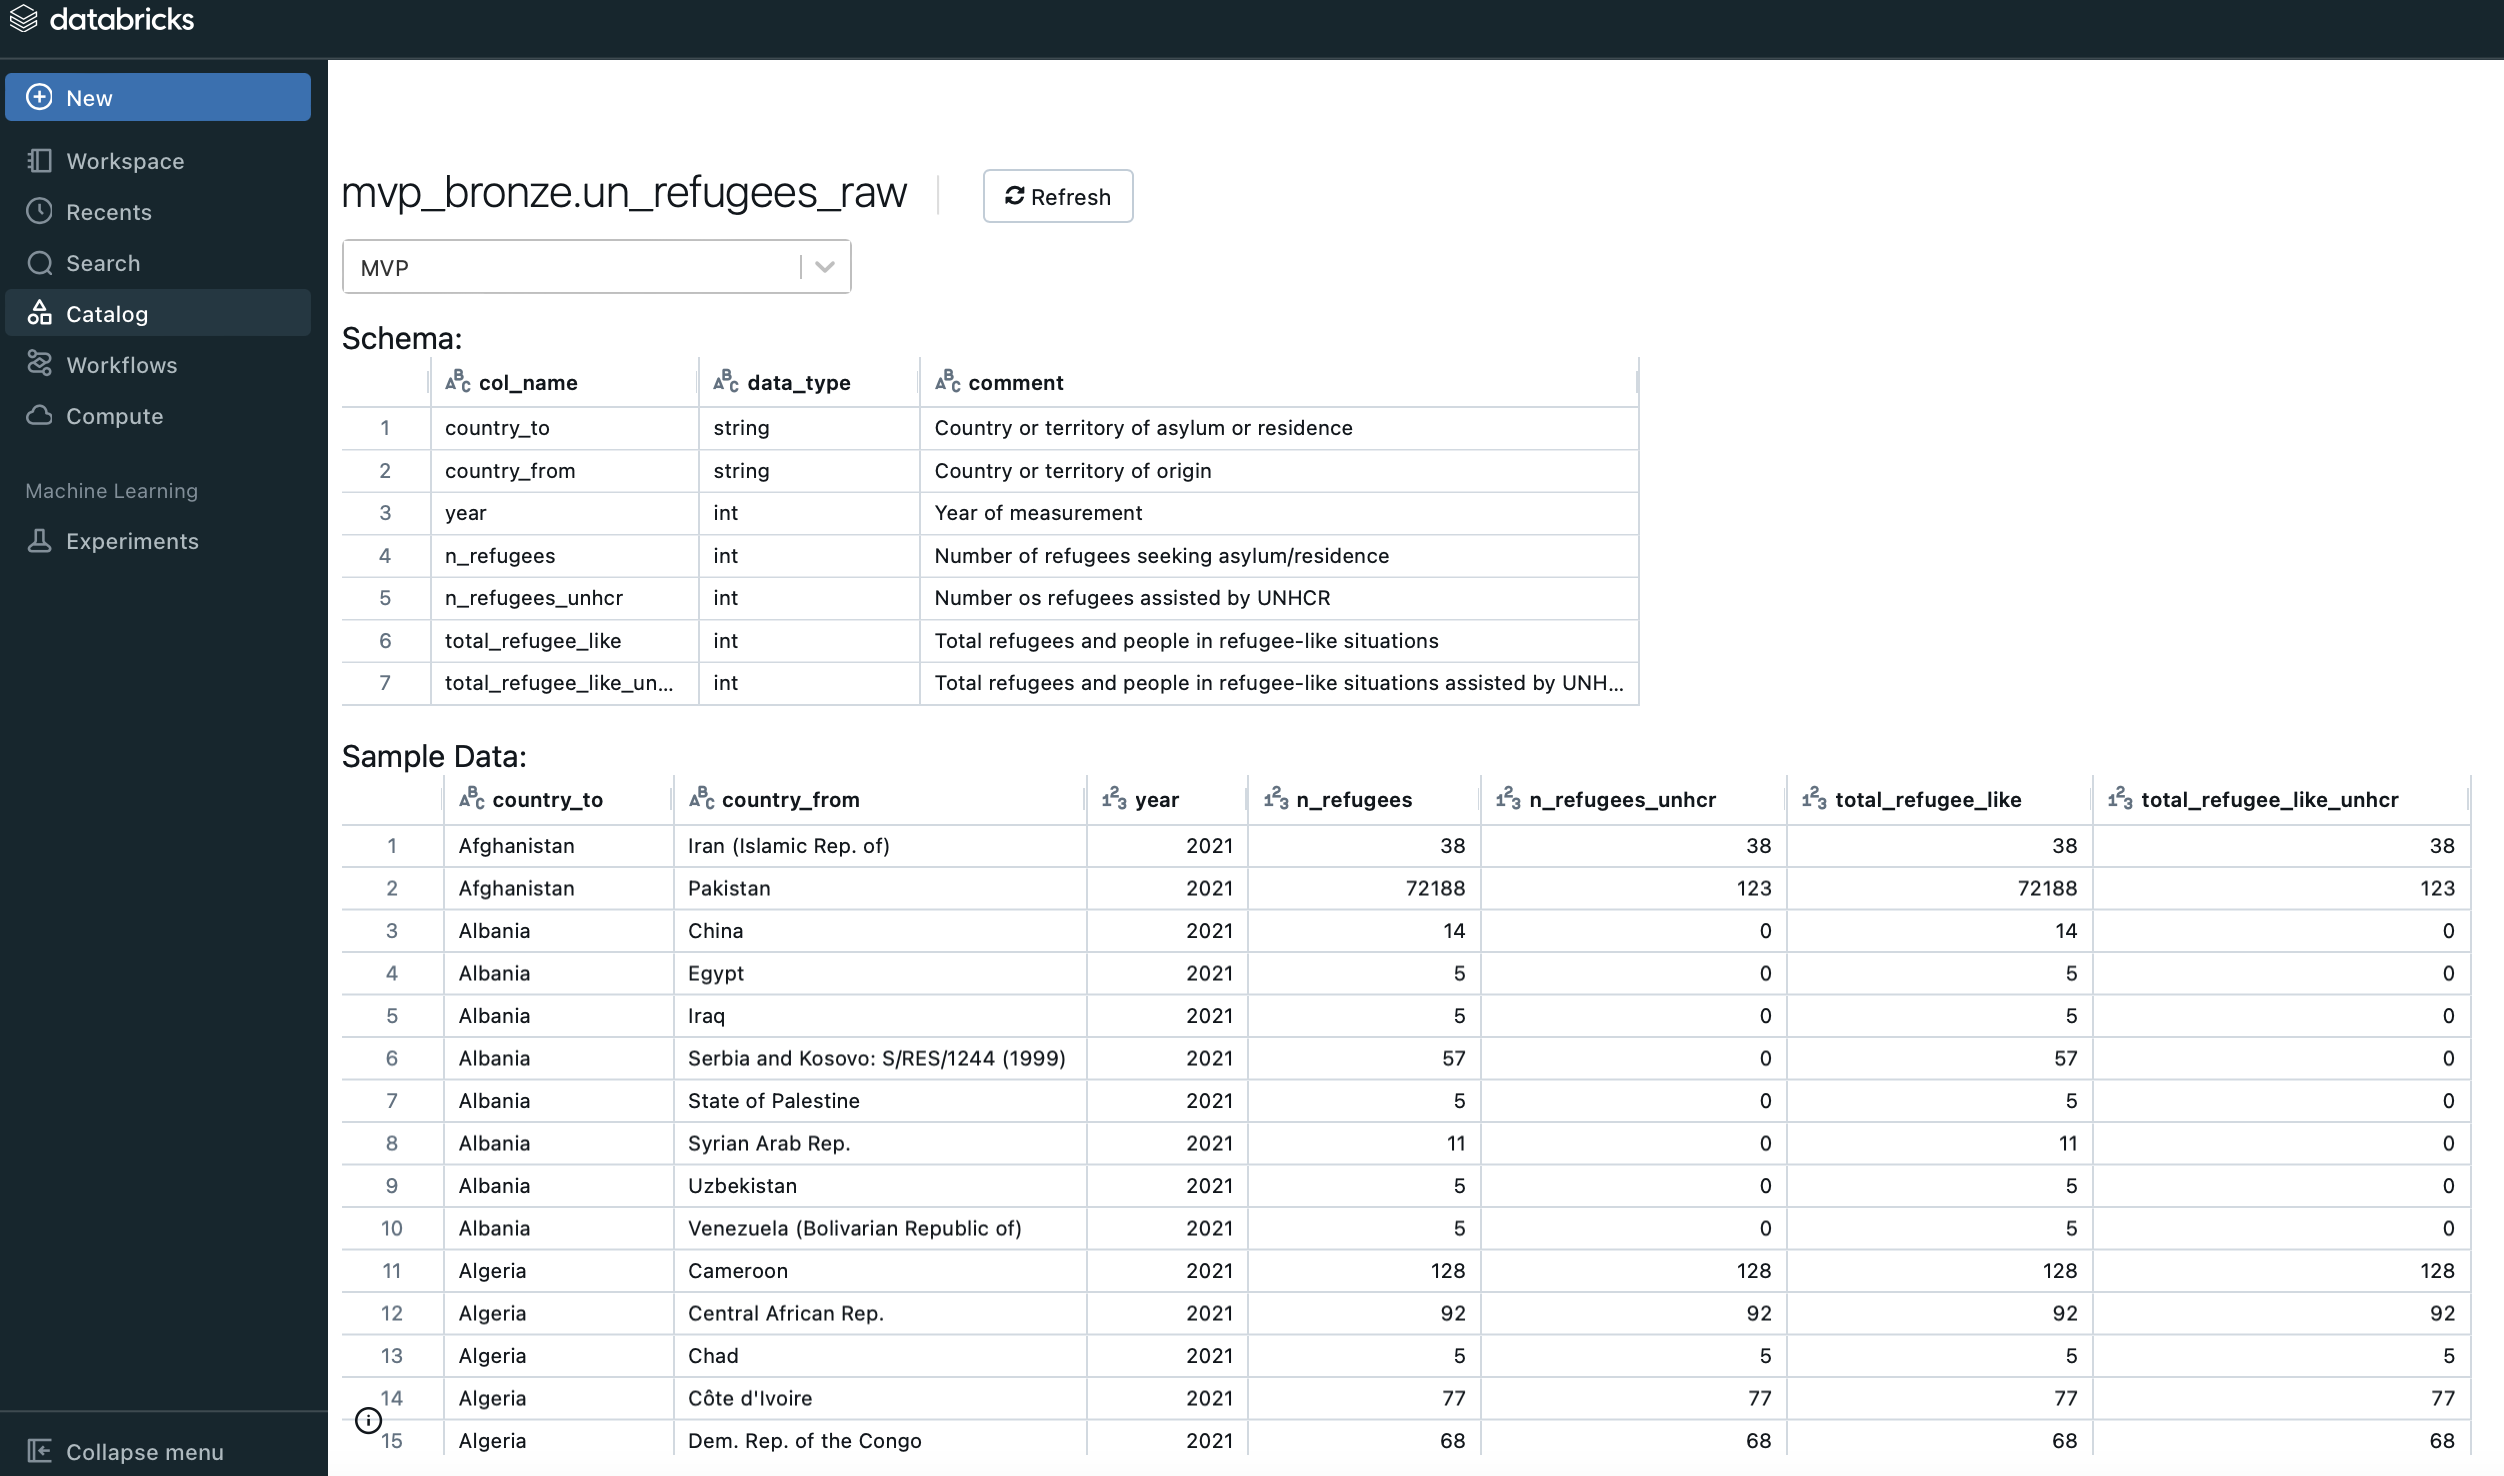

**Silver**

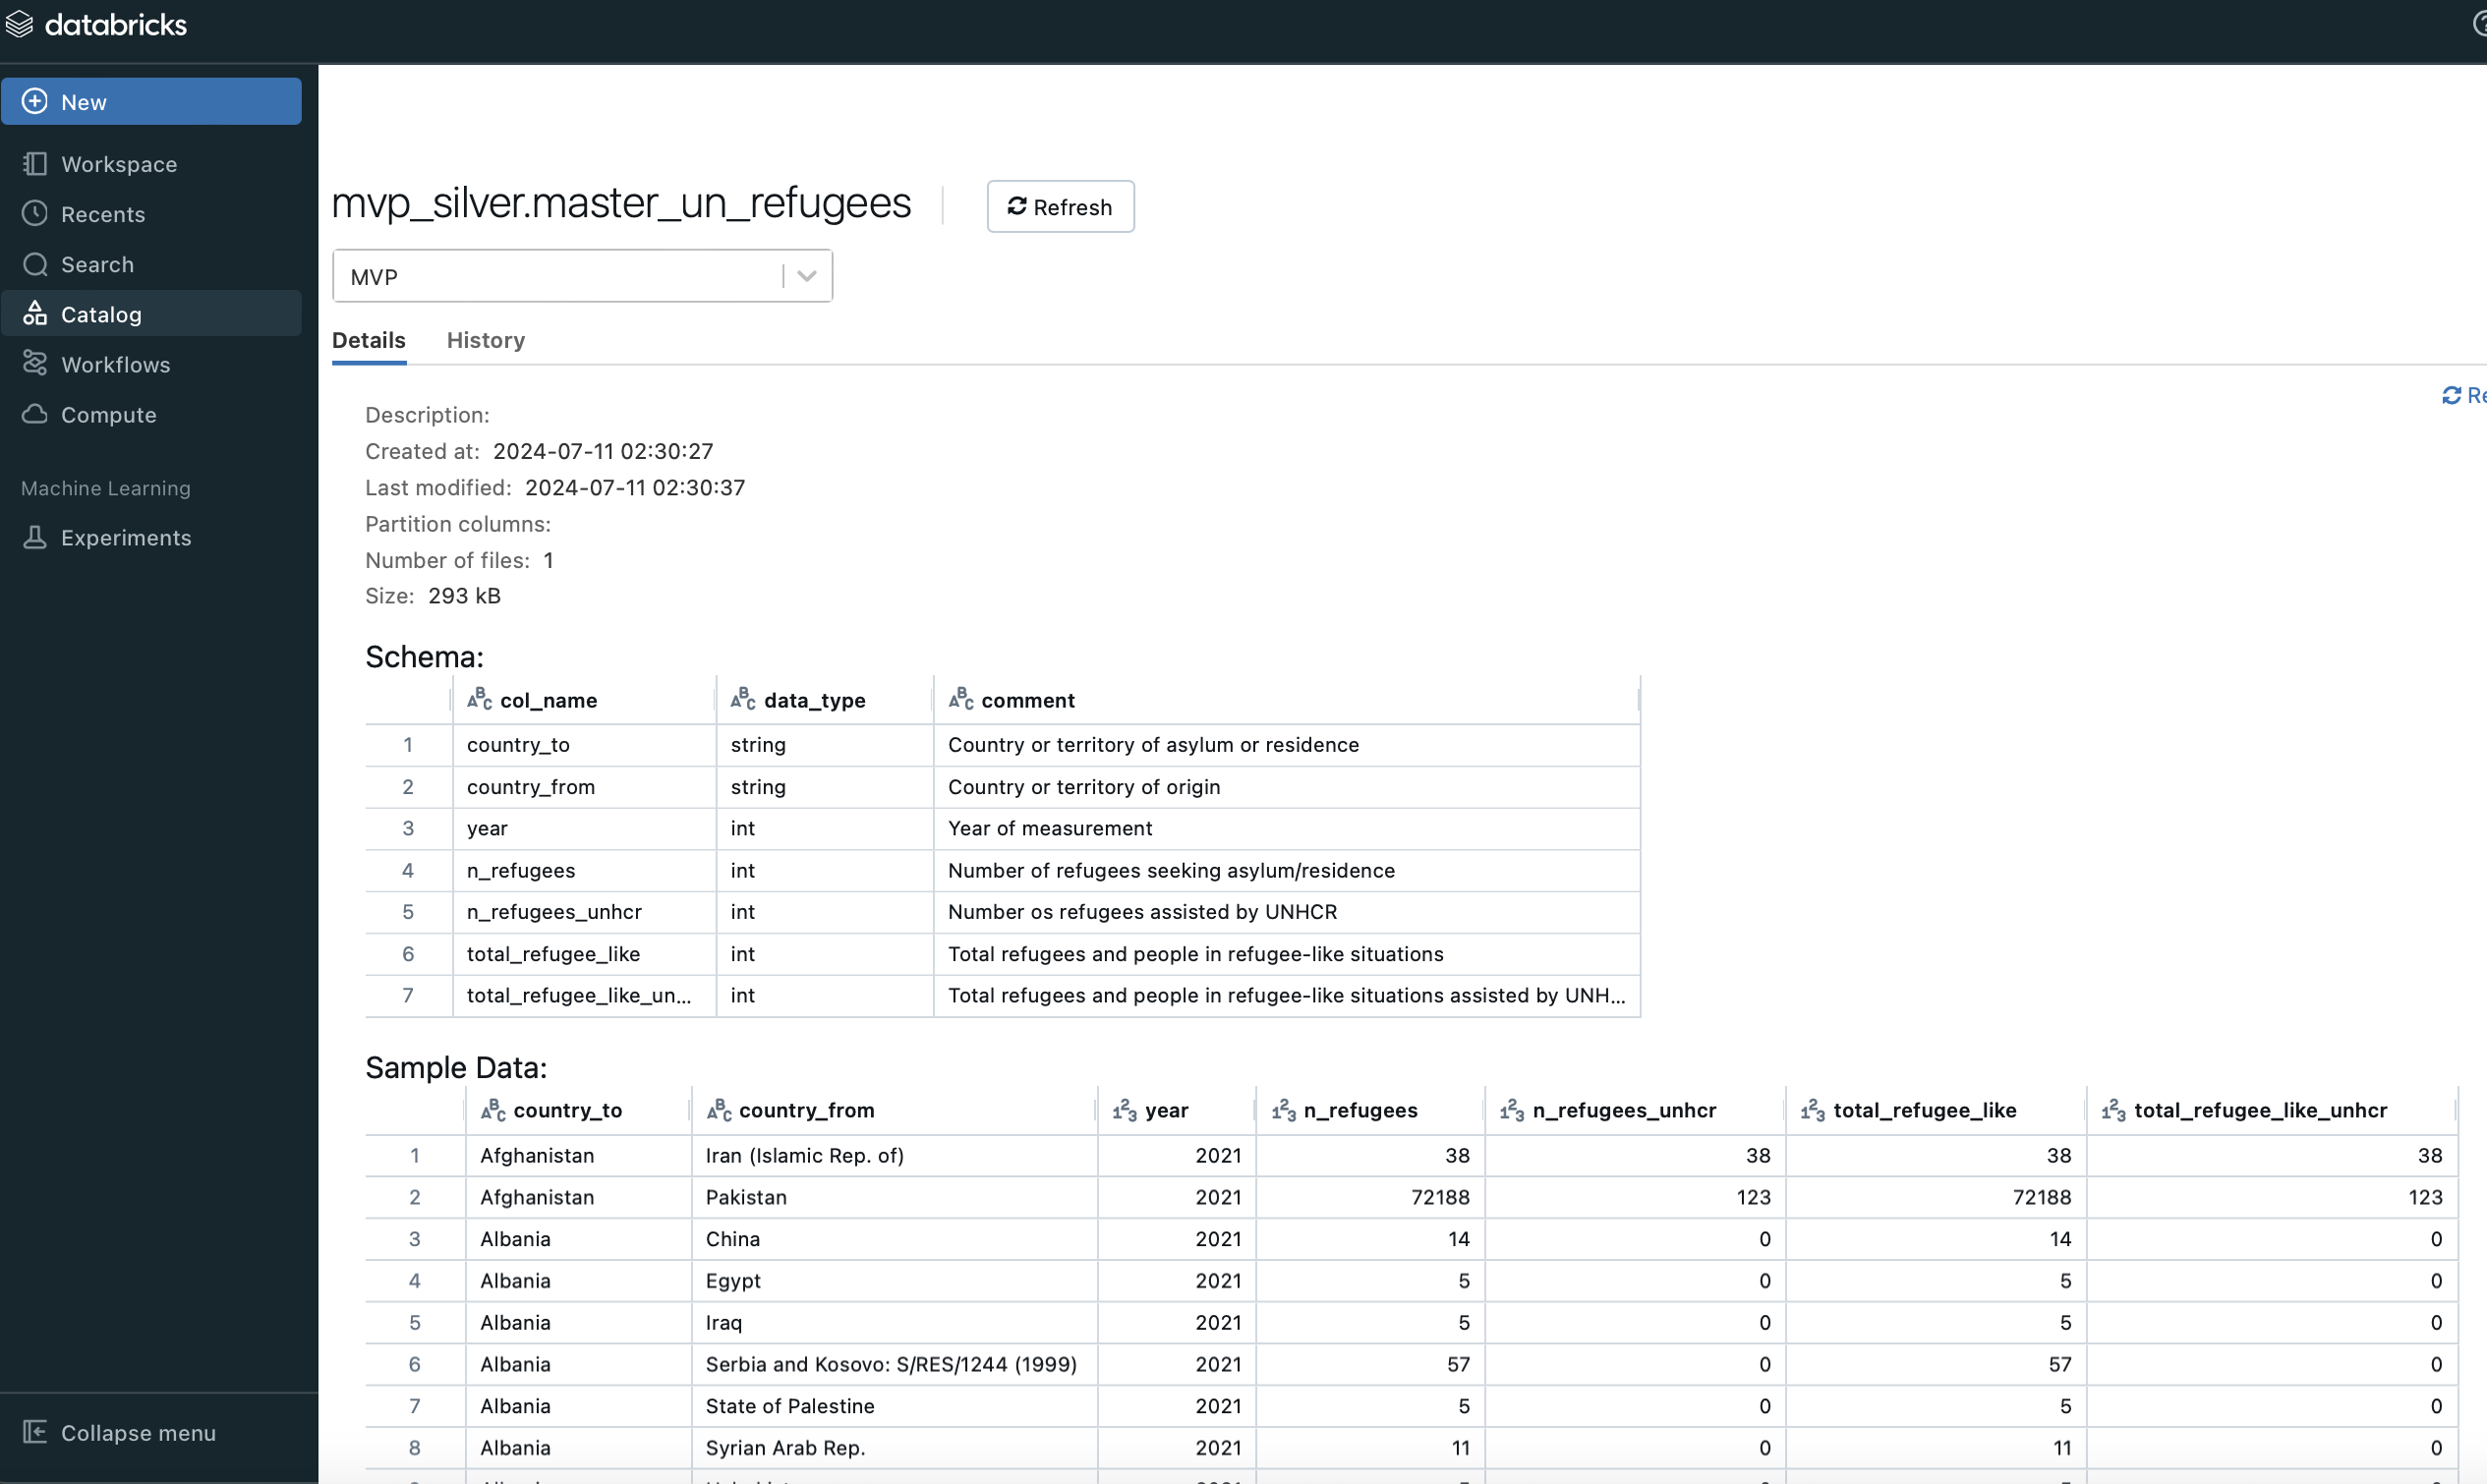

**Gold**

Origin of refugees

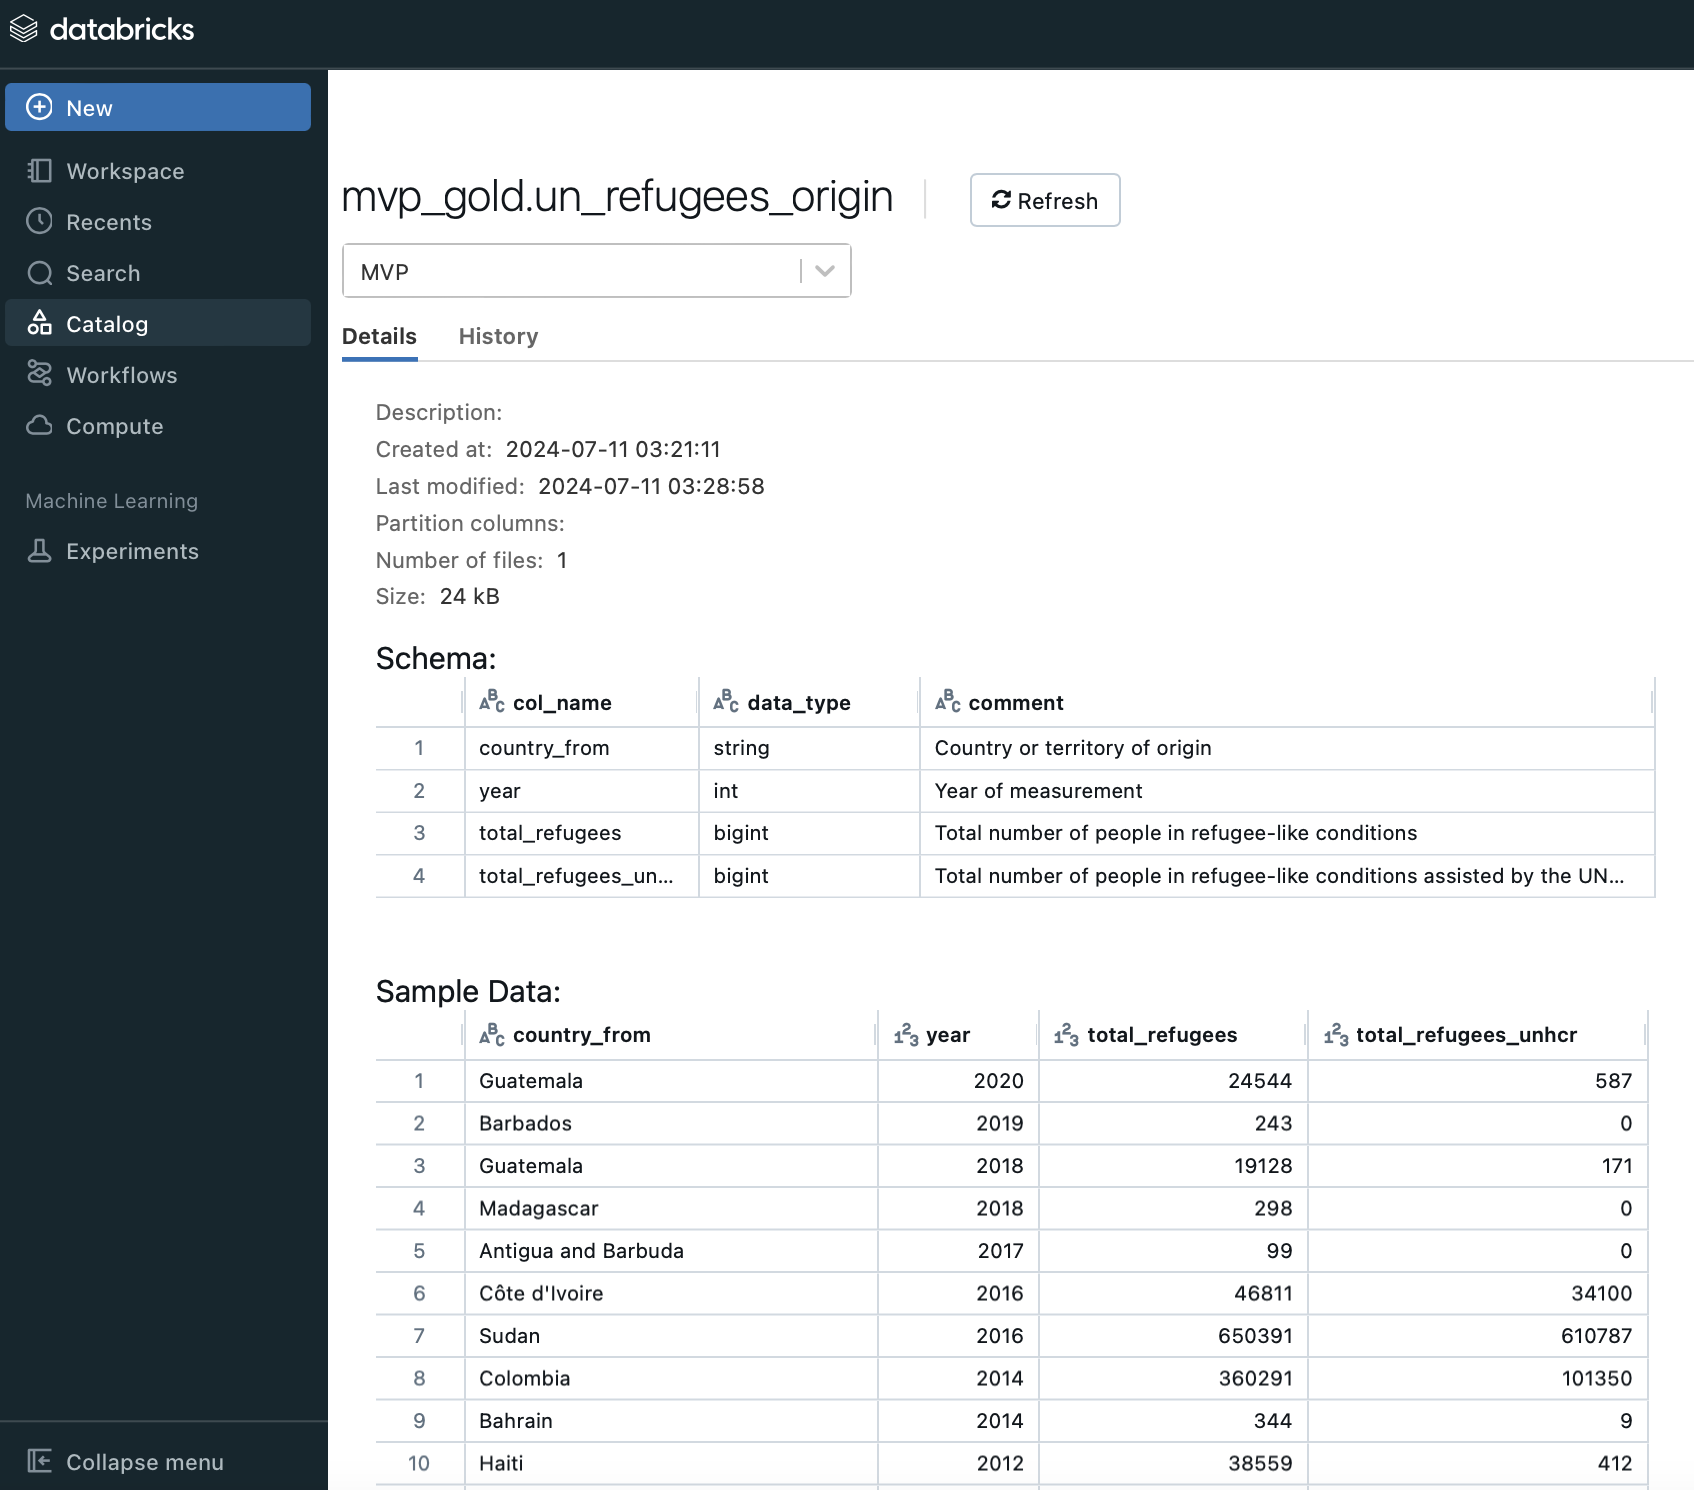

Destiny of refugees

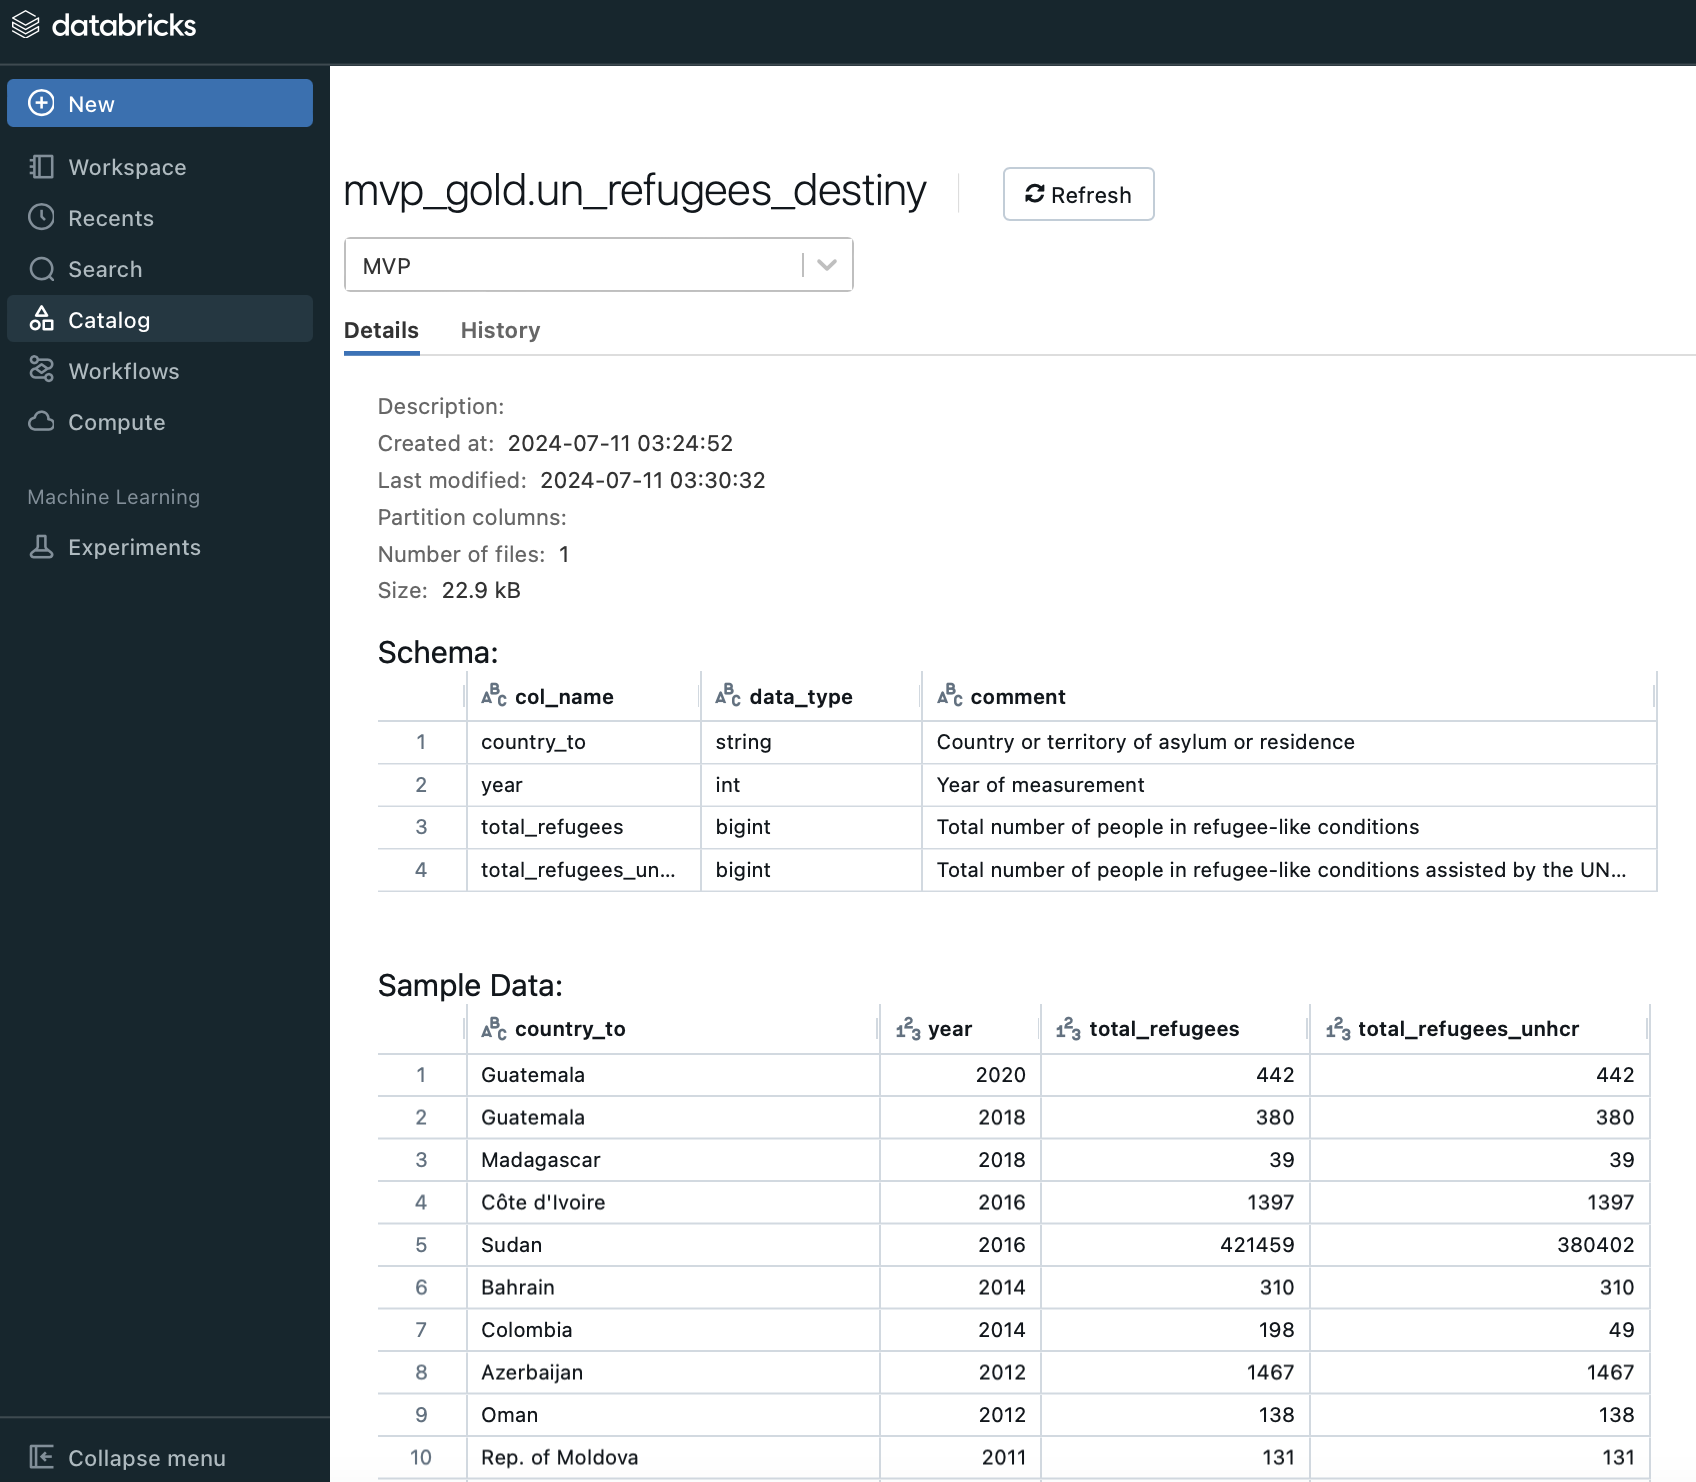

Number of refugees per year

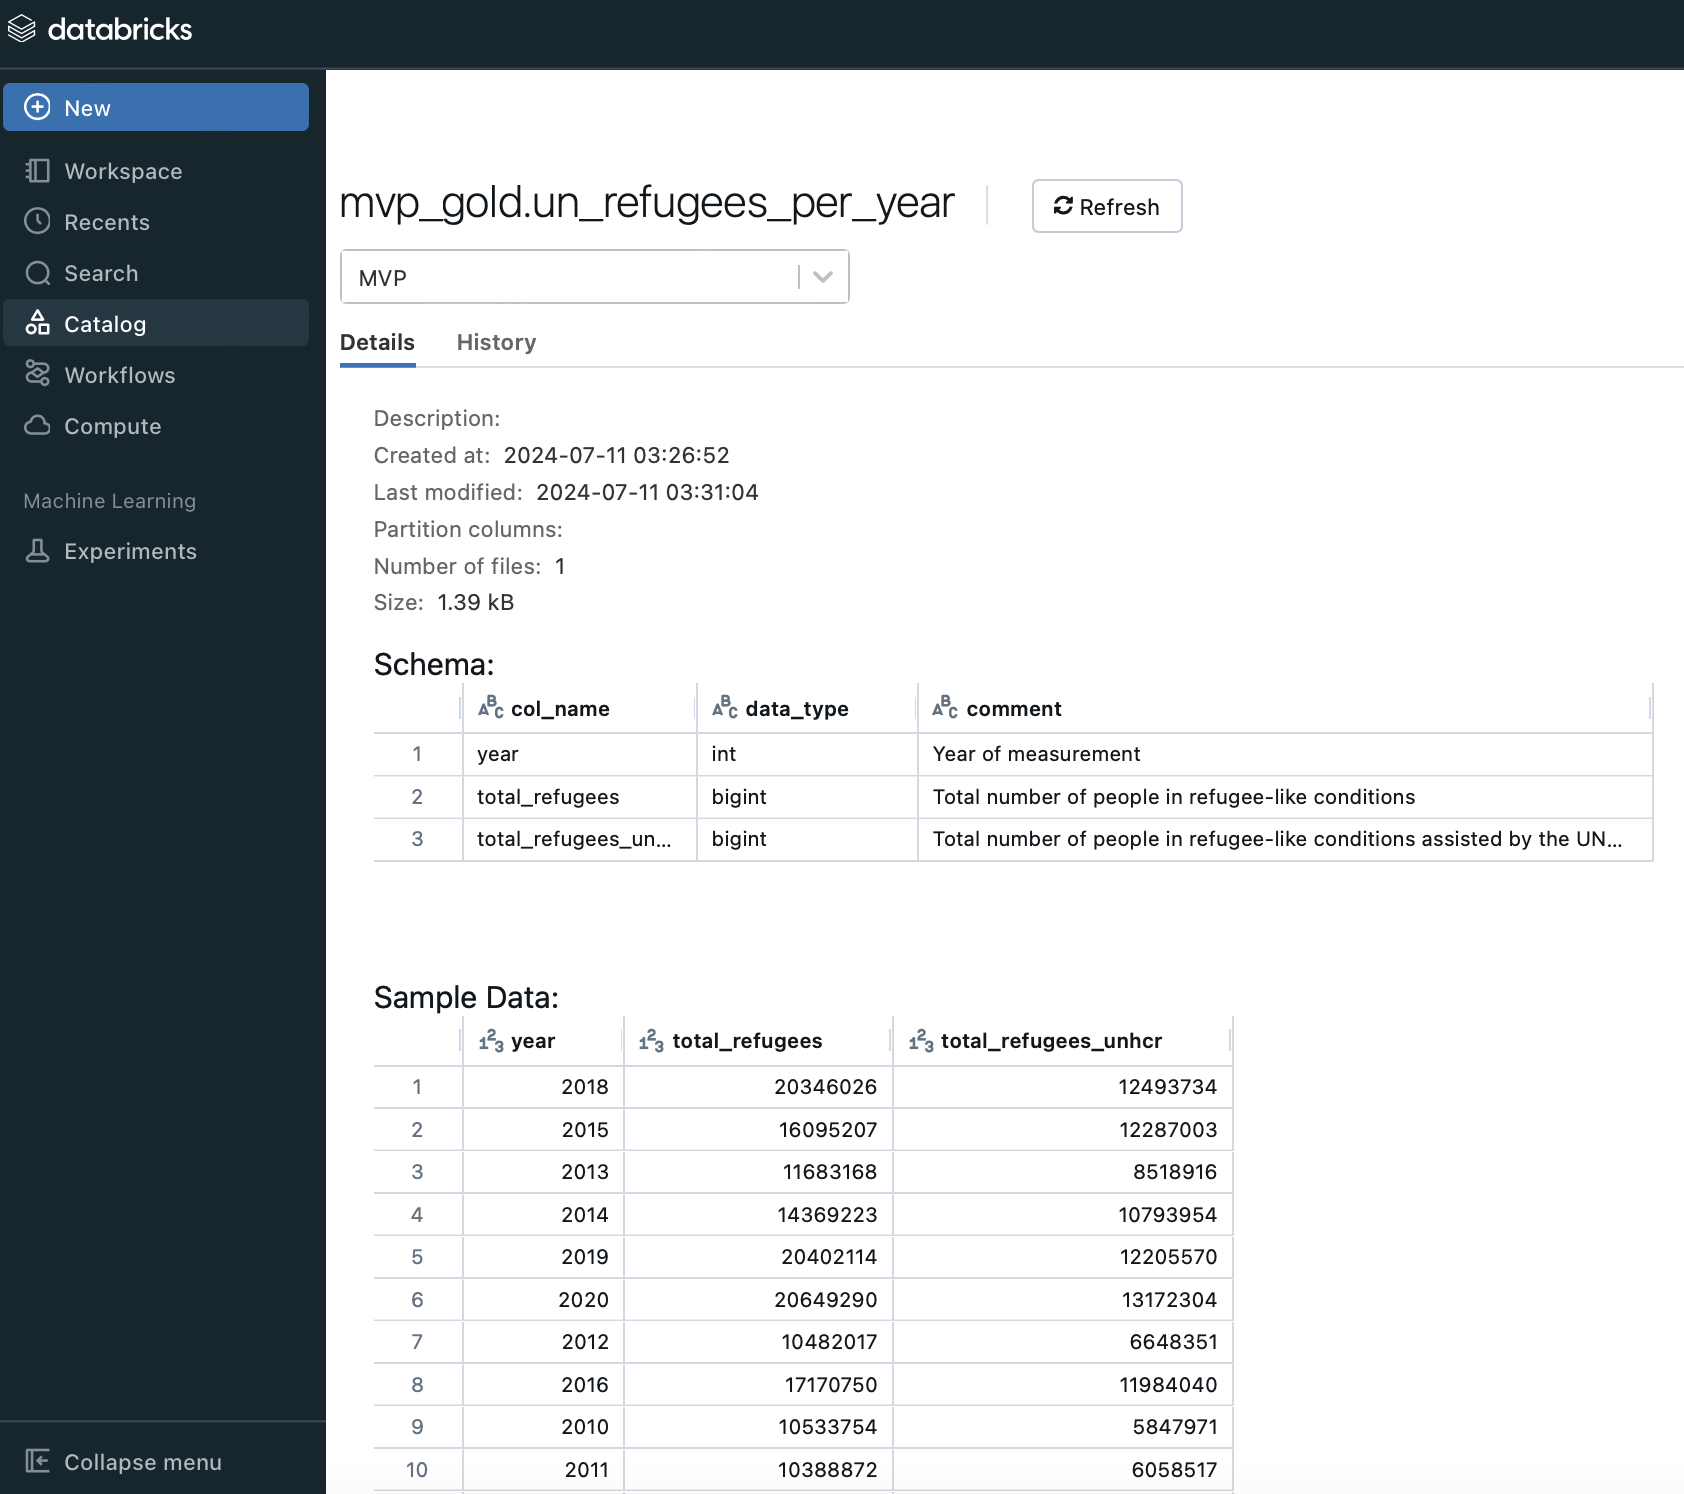

#5. Analysis

##Quality Analysis

Before we start answering the questions proposed in the beginning of the project, let's first check the quality of the data.

While the bronze lawyer has the raw data files, it was necessary to apply a pre processing (data cleaning) during for the silver layer, since the csv file downloaded from the UN Data repository had some null entries. This treatment was applied in the [silver notebook.](https://github.com/estellasouza/Refugees_analysis/blob/main/Databricks_notebooks/2_silver_notebook.ipynb)

Other checks were applied to identify if there were any other issues with the data set, such as the number of years included for each country, but no other issue was identified.

##Data Analysis

As discussed in the beginning of this project, there are several questions that we hope to answer with the data set selected.

They are:
1. What are the main territories of origin of refugees?
2. In which territories they seek asylum/residence in?
3. How does the number of refugees has evolved since 2010?
4. What fraction of refugees are provided with help from the UN?
5. How does Brazil performs when compared to the countries most seeked by refugees?

We will start by loading the tables created in the **gold** layer of our architecture in Databricks and saved as .csv files. We will follow with the visualization and analysis of the datasets.

In [15]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###What are the main territories of origin of refugees?

In [16]:
# Loading data from github repository

# url with location of data - table from gold layer
url = "https://raw.githubusercontent.com/estellasouza/Refugees_analysis/main/Databricks_tables/gold_un_refugees_origin.csv"

# Reading CSV file
df_1 = pd.read_csv(url, encoding='unicode_escape')

# Printing first 5 lines to verify the attributes
df_1.head()

country_from  year  total_refugees  total_refugees_unhcr
0            Guatemala  2020           24544                   587
1             Barbados  2019             243                     0
2            Guatemala  2018           19128                   171
3           Madagascar  2018             298                     0
4  Antigua and Barbuda  2017              99                     0

Finding the top 10 countries/territories where refugees originate from over the entire time considered (2010-2021).

In [17]:
# Grouping our selection by 'country_from', an average of the 'total_refugees' from a country at any year, and sorting for the 10 largest senders of refugees.

df_origin = df_1.groupby('country_from')['total_refugees'].mean().reset_index().sort_values(by='total_refugees', ascending=False).head(10)


In [18]:
df_origin

country_from  total_refugees
169        Syrian Arab Rep.    4.213796e+06
0               Afghanistan    2.655310e+06
160             South Sudan    1.445981e+06
158                 Somalia    9.822949e+05
118                 Myanmar    7.296564e+05
165                   Sudan    6.496988e+05
49   Dem. Rep. of the Congo    6.184747e+05
83                     Iraq    5.790876e+05
32     Central African Rep.    4.350942e+05
58                  Eritrea    4.008910e+05

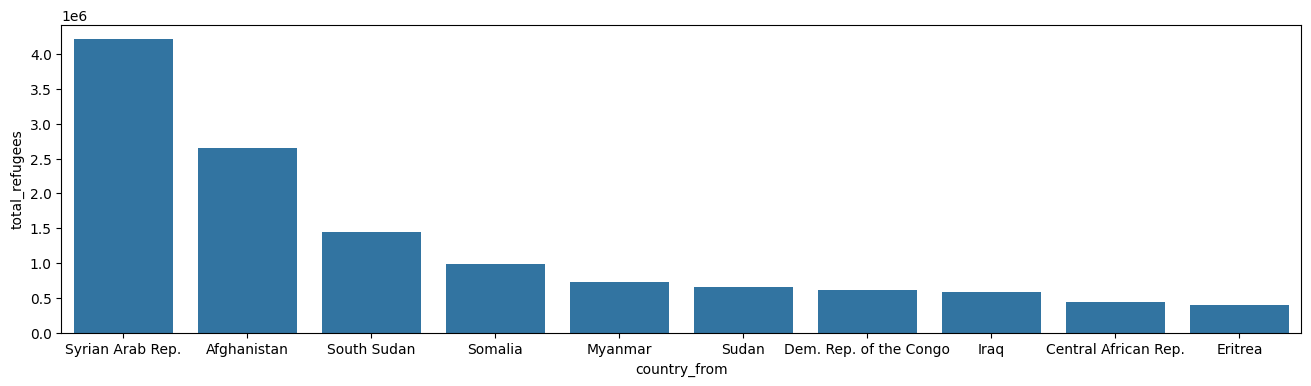

In [19]:
# Set up figure
plt.figure(figsize=(16,4))

sns.barplot(data=df_origin, x='country_from', y='total_refugees')

plt.show()

As we can see above there are millions of people from the top 3 countries (Syria, Afghanistan, and South Sudan) who have left these territories and seeked refuge/residence in other regions. Based on the list of top 10 countries we see above, we can conclude that war is one of the main drivers of emigration (e.g., Syrian civil war, South Sudan civil war, US War in Afghanistan, etc.) since it usually creates humanitarian crisis.

###In which territories they seek asylum/residence in?

In [20]:
# Loading data from github repository

# url with location of data - table from gold layer
url2 = "https://raw.githubusercontent.com/estellasouza/Refugees_analysis/main/Databricks_tables/gold_un_refugees_destiny.csv"

# Reading CSV file
df_2 = pd.read_csv(url2, encoding='unicode_escape')

# Printing first 5 lines to verify the attributes
df_2.head()

country_to  year  total_refugees  total_refugees_unhcr
0       Guatemala  2020             442                   442
1       Guatemala  2018             380                   380
2      Madagascar  2018              39                    39
3  CÃ´te d'Ivoire  2016            1397                  1397
4           Sudan  2016          421459                380402

Finding the top 10 countries/territories where refugees seek refuge/residence from over the entire time considered (2010-2021).

In [21]:
# Grouping our selection by 'country_to', an average of the 'total_refugees' from a country at any year, and sorting for the 10 largest receivers of refugees.

df_destiny = df_2.groupby('country_to')['total_refugees'].mean().reset_index().sort_values(by='total_refugees', ascending=False).head(10)


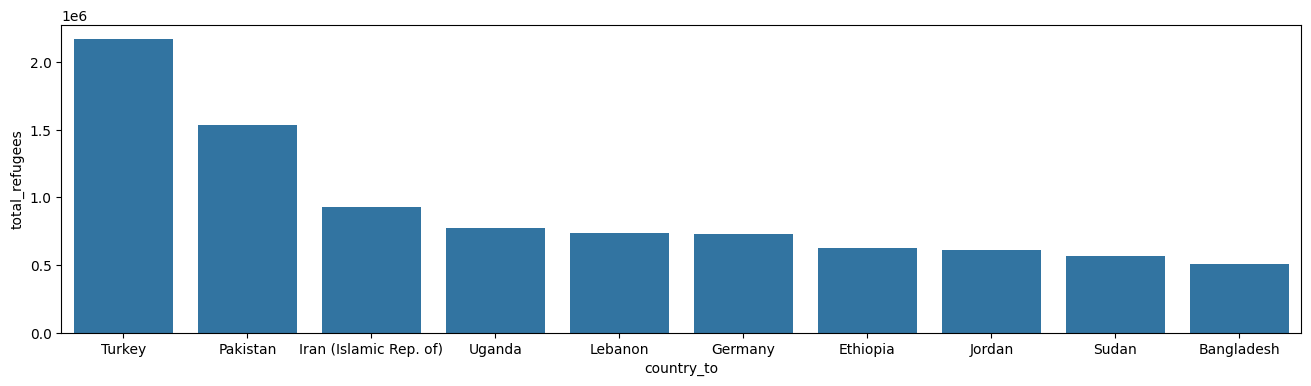

In [22]:
# Set up figure
plt.figure(figsize=(16,4))

sns.barplot(data=df_destiny, x='country_to', y='total_refugees')

plt.show()

We can see that when comparing the list above to the top sender countries, there seems to be a correlation between their location. That means that most refugees seek asylum/residence in their neighboring countries. For example, Pakistan received a large number of Afghan refugees while Turkey and Lebanon were seeked by Syrians escaping civil war.

From the list above, we can see that Germany seems to be the outlier (farther from the top countries from where refugees escape). Looking back, we can relate that to Germany's push (during Angela Merkel's mandate) to support Syrian refugees during the civil war. That resulted in Germany being the only western country in the list above.

###How does the number of refugees has evolved since 2010?

In [23]:
# Loading data from github repository

# url with location of data - table from gold layer
url3 = "https://raw.githubusercontent.com/estellasouza/Refugees_analysis/main/Databricks_tables/gold_un_refugees_per_year.csv"

# Reading CSV file
df_3 = pd.read_csv(url3, encoding='unicode_escape')

# Printing lines to verify the attributes
df_3.head(12)

year  total_refugees  total_refugees_unhcr
0   2018        20346026              12493734
1   2015        16095207              12287003
2   2013        11683168               8518916
3   2014        14369223              10793954
4   2019        20402114              12205570
5   2020        20649290              13172304
6   2012        10482017               6648351
7   2016        17170750              11984040
8   2010        10533754               5847971
9   2011        10388872               6058517
10  2017        19927035              11892038
11  2021        20822798              10543418

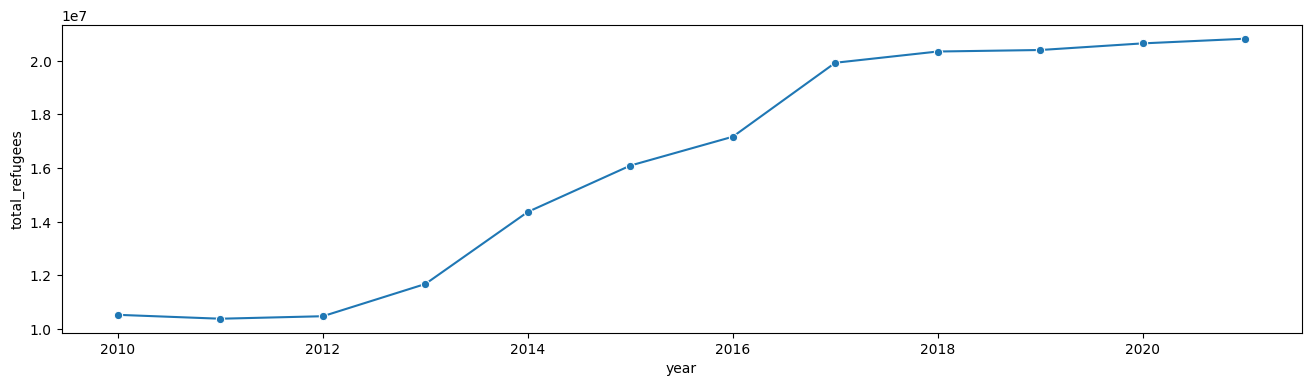

In [24]:
# Set up figure
plt.figure(figsize=(16,4))

sns.lineplot(data=df_3, x='year', y='total_refugees', marker='o')

plt.show()

We can see the evolution on the total number of refugees (summation of the refugees number in each country). Over the years of 2012-2017 there was a very significant increase in the number of people in refugee-like situation (an increase of ~100%). This is likely due to the events of the Arab Spring in the beginning of 2010's and the humanitarian crisis in Syria. The increase trend is much softer since 2017.

###What fraction of refugees are provided with help from the UN?

In order to answer this question, let's take the yearly average of of people in refugee-like situation and the average of refugee-like people that are supported by the UNHCR.

In [40]:
# Average refugee-like people per year
avg_refugees = df_3['total_refugees'].mean()

# Average refugee-like people per year helped by UNHCR
avg_refugees_unhcr = df_3['total_refugees_unhcr'].mean()

# Print values
print('Average number of total refugees per year: %.1fM' % (avg_refugees/(10**6)))
print('Average number of total refugees per year supported by the UNHCR: %.1fM' % (avg_refugees_unhcr/(10**6)))

print('Percentage of people in refugee-like situations supported by the UNHCR: %.1f%%' % (avg_refugees_unhcr*100/avg_refugees))

Average number of total refugees per year: 16.1M
Average number of total refugees per year supported by the UNHCR: 10.2M
Percentage of people in refugee-like situations supported by the UNHCR: 63.5%


About more than 60% of people in refugee-like conditions are assisted by United Nations High Commissioner for Refugees. That is an impressive number, considering the millions of people that are found in this conditions.

We can also look at how this number has changed over time.

In [43]:
df_4 = pd.read_csv(url3, encoding='unicode_escape')
df_4['share_assisted'] = 100*df_4['total_refugees_unhcr']/df_4['total_refugees']

In [44]:
df_4

year  total_refugees  total_refugees_unhcr  share_assisted
0   2018        20346026              12493734       61.406262
1   2015        16095207              12287003       76.339515
2   2013        11683168               8518916       72.916147
3   2014        14369223              10793954       75.118564
4   2019        20402114              12205570       59.825026
5   2020        20649290              13172304       63.790590
6   2012        10482017               6648351       63.426257
7   2016        17170750              11984040       69.793340
8   2010        10533754               5847971       55.516495
9   2011        10388872               6058517       58.317371
10  2017        19927035              11892038       59.677910
11  2021        20822798              10543418       50.634012

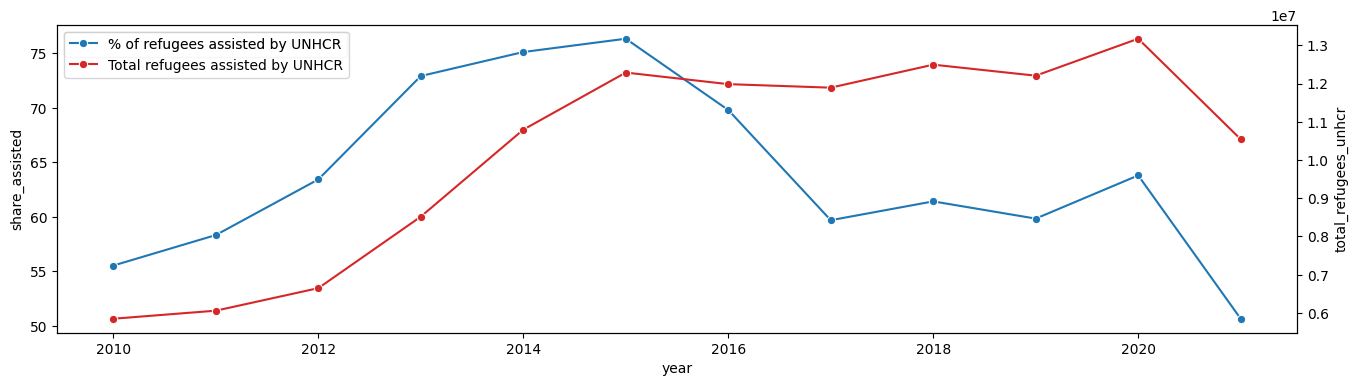

In [61]:
# Set up figure
plt.figure(figsize=(16,4))

ax0 = sns.lineplot(data=df_4, x='year', y='share_assisted', marker='o', color="tab:blue", label='% of refugees assisted by UNHCR')
ax1 = sns.lineplot(data=df_4, x='year', y='total_refugees_unhcr', ax=ax0.axes.twinx(), marker='o', color="tab:red", label='Total refugees assisted by UNHCR')
ax0.legend(loc='upper left')
ax1.legend([ax0.get_lines()[0], ax1.get_lines()[0]],['% of refugees assisted by UNHCR','Total refugees assisted by UNHCR'],loc='upper left')

plt.show()

Although we saw that the UNHCR has assisted on average 63% of refugees and people in refugee-like situation, this number has been decreasing. It reached a high in 2015, ~75%, but lowered to ~50% in 2021. It would be interesting to see how it has evolved since then, if we had the data, to understand if the trend has continued or switched back to increasing the share of assistance.

It's important to notice that although this percentage has been decreasing, the total number of assisted refugees has not seen much variation since 2015.

###How does Brazil performs when compared to the countries most seeked by refugees?

Based on the analysis above, it is clear that Brazil is not one of the most seeked countries by refugees. That is likely due to the distance to the regions in humanitarian crisis.

We can leverage a table already mentioned above (from table 'gold_un_refugees_destiny.csv') from the gold layer to look at how the number of refugees in Brazil has evolved between 2010 and 2021.

In [66]:
# Reading CSV file
df_5 = pd.read_csv(url2, encoding='unicode_escape') # from table is gold layer (url for gold_un_refugees_destiny.csv)

# Printing lines to verify the attributes
df_5.head()

country_to  year  total_refugees  total_refugees_unhcr
0       Guatemala  2020             442                   442
1       Guatemala  2018             380                   380
2      Madagascar  2018              39                    39
3  CÃ´te d'Ivoire  2016            1397                  1397
4           Sudan  2016          421459                380402

Let's select the data for Brazil to build our plot and answer our questions.

In [68]:
df_brazil = df_5[df_5['country_to']=='Brazil']
df_brazil['share_assisted'] =100*df_brazil['total_refugees_unhcr']/df_brazil['total_refugees']
df_brazil

<ipython-input-68-1a07eeba3239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['share_assisted'] =100*df_brazil['total_refugees_unhcr']/df_brazil['total_refugees']


country_to  year  total_refugees  total_refugees_unhcr  share_assisted
172      Brazil  2019           32844                 22730       69.205943
329      Brazil  2021           60848                 28256       46.437023
390      Brazil  2011            4466                  2764       61.889834
447      Brazil  2014            7478                  1072       14.335384
650      Brazil  2020           59092                 27449       46.451296
819      Brazil  2018           11304                  3432       30.360934
1194     Brazil  2013            5185                   878       16.933462
1419     Brazil  2016            9674                  1813       18.740955
1494     Brazil  2015            8703                  1744       20.039067
1553     Brazil  2010            4346                  2805       64.542108
1574     Brazil  2017           10260                  3561       34.707602
1647     Brazil  2012            4681                  1994       42.597736

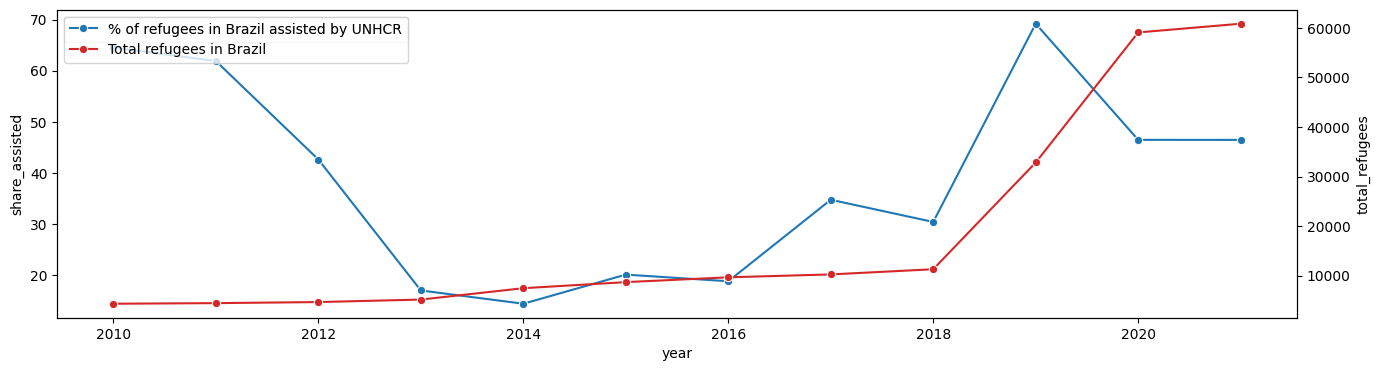

In [69]:
# Set up figure
plt.figure(figsize=(16,4))

ax0 = sns.lineplot(data=df_brazil, x='year', y='share_assisted', marker='o', color="tab:blue", label='% of refugees in Brazil assisted by UNHCR')
ax1 = sns.lineplot(data=df_brazil, x='year', y='total_refugees', ax=ax0.axes.twinx(), marker='o', color="tab:red", label='Total refugees in Brazil')
ax0.legend(loc='upper left')
ax1.legend([ax0.get_lines()[0], ax1.get_lines()[0]],['% of refugees in Brazil assisted by UNHCR','Total refugees in Brazil'],loc='upper left')

plt.show()

By 2020, Brazil had about 60K people in refugee-like situation seeking asylum/residence in the country. This number is not very significant, considering the size of the territory, but it has been increasing (600% increase between 2018 and 2021).

Since it is not in the top countries receiving refugees, the assitance provided by the UNHCR has varied considerably between these years (between 10-70%).

#6. Conclusion and Autoevaluation

As displayed throughout this project, we were able to perform an analysis on the number of refugees over time, their countries of origin, and where they are displaced too leveraging data provided by the UNHCR (the UN Refugee Agency).

Extracting the data from the UN Data repository was a simple process. The data was provided in a flat model, with high quality (minimal treatment was required as preprocessing), and was loaded to the cloud via the Databricks platform. A medallion architecture was used to display how the data arrived (bronze layer), how it was processed (silver layer), and how to easily answer the proposed questions with summarized tables (gold layer). The entire process is described and shown in this notebook and [databricks notebooks.](https://github.com/estellasouza/Refugees_analysis/tree/main/Databricks_notebooks)

It was remarkable to be able to answer so many questions with a simple data set while connecting to relevant historical, humanitarian, and political information from the last decade. All questions proposed in the beginning of the project were answered, and many more followed. It would be particularly interesting to get access to data post 2021, to understand how these numbers changed in the years following COVID-19 and how the Israel-Palestine war will impact the numbers observed.